In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import random
import cufflinks as cf
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import math
import seaborn as sns
import chart_studio.plotly as pt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from pmdarima import auto_arima
from scipy.stats import boxcox,boxcox_normplot
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error

In [2]:
from plotly.offline import iplot,plot,init_notebook_mode,download_plotlyjs

In [3]:
init_notebook_mode()

In [4]:
cf.go_offline()
%matplotlib inline

In [5]:
finalcsv = pd.read_csv('FinalMalaria.csv',index_col='DATE(IST)',parse_dates=['DATE(IST)'])

In [6]:
malaria_cases = pd.read_csv('2005-2019_Malaria_Cases.csv')

malaria_cases.columns = ['Year', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', 'Sum']

malaria_cases.index = malaria_cases['Year']

malaria_cases.drop(['Year','Sum'],inplace=True,axis=1)

malaria_cases_list = []

for i in range(malaria_cases.shape[1]):
    for j in range(malaria_cases.shape[0]):
        malaria_cases_list.append(malaria_cases.iloc[j,i])

In [7]:
malaria_cases

2005    2006    2007    2008    2009    2010    2011    2012  \
Year                                                                        
January     315.0   337.0   511.0   253.0   393.0   314.0   352.0   374.0   
February    314.0   288.0   352.0   202.0   328.0   293.0   327.0   338.0   
March       320.0   346.0   377.0   216.0   452.0   405.0   495.0   480.0   
April       413.0   387.0   339.0   335.0   459.0   653.0   691.0   713.0   
May         457.0   445.0   601.0   522.0   642.0   656.0   789.0   876.0   
June        633.0   912.0   566.0   660.0   771.0   662.0   923.0  1046.0   
July        751.0  1256.0   878.0  1112.0  1158.0  1680.0  1441.0  1501.0   
August     1201.0  2630.0  1430.0  1423.0  1960.0  2846.0  2127.0  1942.0   
September  1639.0  2997.0  1605.0  2716.0  1693.0  2233.0  2567.0  1717.0   
October    1097.0  1022.0  1648.0  1487.0  1246.0  1932.0  1285.0  1689.0   
November    643.0  1139.0   867.0   844.0   809.0  1371.0   761.0   612.0   
December    509.0   858.0   591.0   371.0   452.0   818.0   502.0   285.0   

             2013    2014    2015    2016    2017   2018   2019  
Year                                                             
January     256.0   241.0   178.0   192.0   150.0   99.0   60.0  
February    288.0   250.0   171.0   201.0   164.0  111.0   56.0  
March       462.0   396.0   249.0   380.0   298.0  199.0  112.0  
April       690.0   495.0   373.0   515.0   418.0  299.0  169.0  
May         727.0   479.0   520.0   674.0   610.0  435.0  198.0  
June        888.0   607.0   723.0   762.0   662.0  406.0  253.0  
July       1418.0   774.0  1306.0  1152.0   998.0  724.0  510.0  
August     1460.0   902.0  1472.0  1598.0  1355.0  939.0  757.0  
September  1136.0  1362.0  1733.0  1799.0   915.0  541.0  537.0  
October     843.0   937.0  1344.0  1055.0   770.0  426.0  517.0  
November    722.0   667.0   639.0   765.0   591.0  266.0  343.0  
December    335.0   496.0   390.0   238.0   168.0  137.0  155.0

In [8]:
date = pd.date_range('01/01/2005',freq='M',periods=180)

In [9]:
fig = px.line(y=malaria_cases_list)
fig.show()

# Predicting one step in future

In [10]:
one_size = int(len(malaria_cases_list)*0.999)

In [11]:
one_train,one_test = malaria_cases_list[:one_size],malaria_cases_list[one_size:]

In [12]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
decomposition = seasonal_decompose(malaria_cases_list,period=12)

In [14]:
fig = make_subplots(specs = [[{'secondary_y':True}]])
fig.add_trace(go.Scatter(y=decomposition.trend,name='Trend',mode='lines'))
fig.add_trace(go.Scatter(y=decomposition.seasonal,name='Seasonal',mode='lines'))
fig.add_trace(go.Scatter(y=decomposition.resid,name='Noise',mode='lines'))
fig.add_trace(go.Scatter(y=malaria_cases_list,name='Malaria cases',mode='lines'))
fig.update_layout(title_text='Trend, Seasonality and Noise with Number of Malaria Cases registerd')

In [15]:
from statsmodels.tsa.stattools import acf,pacf

To find the Auto-correlation which will eventually help us to find the Moving Average

In [16]:
from pandas.plotting import autocorrelation_plot

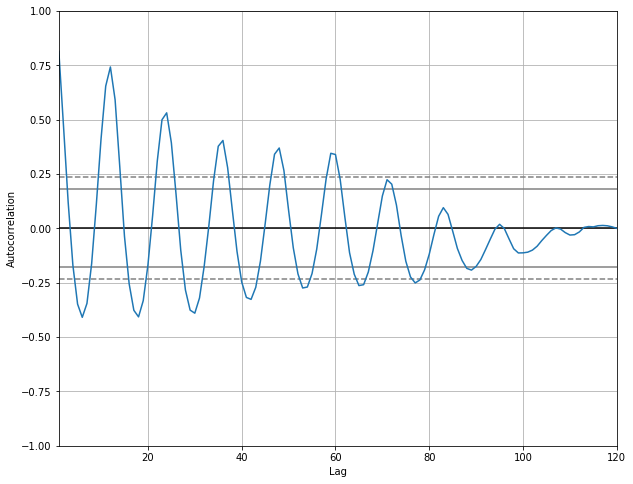

In [17]:
plt.figure(figsize=(10,8))
auto_corr = autocorrelation_plot(finalcsv['Malaria_cases'])

Now, we will find the partial ACF in order to find the ideal value of the AutoRegressive term 

In [18]:
partial_corr = pacf(malaria_cases_list,nlags=36)

In [19]:
fig = px.bar(y=partial_corr,title='Partial Auto-correlation fucntion of malaria cases showing last 12 months')
fig.update_xaxes(title_text='Months Prior')
fig.show()

Now, we will find the stationarity of the Data using Dickey–Fuller test.

In [20]:
from adFuller import stationarity_or_not_ad_fuller

In [21]:
stationarity_or_not_ad_fuller(finalcsv['Malaria_cases'])

Results of Dickey-Fuller Test:
Test Statistic                  -0.830413
p-value                          0.810025
#Lags Used                      13.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


Since, our p-value is > 0.05 so, we can say our Data is not stationary. That is why we can not use ARIMA models on our data.

In [22]:
single_size = int(len(malaria_cases_list)*0.9999)

In [23]:
single_train,single_test = malaria_cases_list[:single_size],malaria_cases_list[single_size:]

In [24]:
single_model = SARIMAX(single_train, trend='c', order=(1,1,0), seasonal_order=(2,0,0,12),enforce_stationarity=False,
                       enforce_invertibility=False)

In [25]:
single_fit = single_model.fit()

In [26]:
single_predict = single_fit.forecast(steps=1)

In [27]:
single_predict

array([155.27129112])

In [28]:
print_DF = pd.DataFrame(malaria_cases_list,columns=['Malaria_cases'])

In [29]:
print_DF['Predicted'] = np.NaN

In [30]:
print_DF['Predicted'][-1:] = single_predict

In [31]:
print_DF.index = date

In [32]:
fig = make_subplots()
fig.add_trace(go.Scatter(x=print_DF.index,y=print_DF['Malaria_cases'],name='Given Malaria Disease'))
fig.add_trace(go.Scatter(x=print_DF.index,y=print_DF['Predicted'],name='Predicted Values',mode='markers'))

In [33]:
# print_DF.to_csv('results/predictingCheck.csv',header=True,index=True)

In [34]:
multiple_fit = single_model.fit()

In [35]:
multiple_predict = multiple_fit.forecast(steps=12)

In [36]:
multiple_predict

array([155.27129112,  96.81208475, 100.53546911, 152.36932259,
       209.47003086, 269.26876792, 278.40174895, 488.57662385,
       657.45151529, 430.63163769, 380.75294357, 257.7941037 ])

In [37]:
fig = make_subplots()
fig.add_trace(go.Scatter(x=pd.date_range('01/01/2005',freq='M',periods=180),y=malaria_cases_list,name='Given Malaria Disease'))
fig.add_trace(go.Scatter(x=pd.date_range('12/01/2019',freq='M',periods=12),y=multiple_predict,name='Predicted Values'))

In [38]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [39]:
malaria_cases_list_final = malaria_cases_list

In [40]:
malaria_cases_list_final[-1] = 145

In [41]:
finalcsv = pd.read_csv('FinalMalaria.csv',index_col='DATE(IST)',parse_dates=True)

In [42]:
finalcsv.iloc[:,9] = malaria_cases_list_final[-120:]

In [43]:
finalcsv.head()

ALTITUDE(m)  AIR_TEMP(°C)  WIND_SPEED(m/s)  WIND_DIRECTION(deg)  \
DATE(IST)                                                                     
2010-01-31           11            21         1.329630           108.386296   
2010-02-28           11            24         1.112308           224.283462   
2010-03-31           11            29         0.699615           182.606923   
2010-04-30           11            33         1.057895           218.488947   
2010-05-31           11            35         1.326923           242.535769   

            ATMO_PRESSURE(hpa)  HUMIDITY(%)  RAIN_FALL(mm)  Month  rain_days  \
DATE(IST)                                                                      
2010-01-31              1016.0    47.065367            1.0      1          0   
2010-02-28              1013.0    47.516195            1.0      2          0   
2010-03-31              1010.0    51.418374            1.0      3          0   
2010-04-30              1007.0    60.746518            1.0      4          0   
2010-05-31              1003.0    65.298106            1.0      5          0   

            Malaria_cases  Max_temp  Min_temp  Max_humidity  Min_humidity  \
DATE(IST)                                                                   
2010-01-31          314.0        31        10            88            14   
2010-02-28          293.0        36        12            82             7   
2010-03-31          405.0        43        16            83             5   
2010-04-30          653.0        43        22            83             6   
2010-05-31          656.0        47        22            89             6   

            Max_pressure  Min_pressure  
DATE(IST)                               
2010-01-31          1023          1010  
2010-02-28          1101          1008  
2010-03-31          1100          1002  
2010-04-30          1012          1000  
2010-05-31          1099           996

In [44]:
finalcsv_corr = finalcsv.corr()

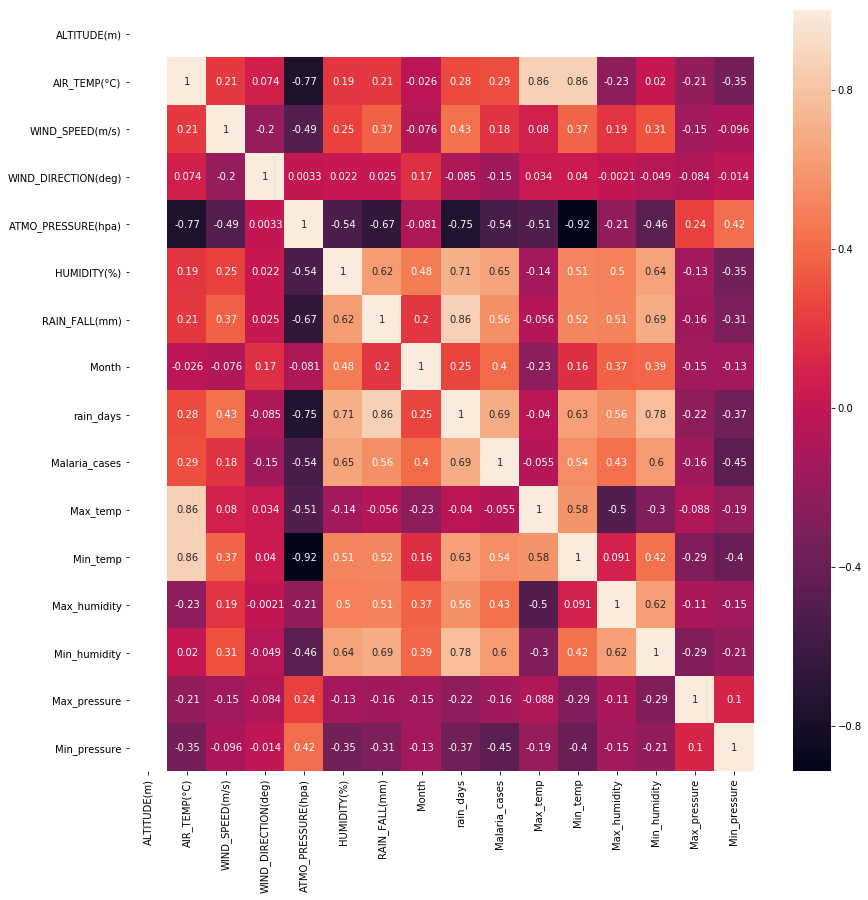

In [45]:
plt.figure(figsize=(14,14))
sns.heatmap(finalcsv_corr,annot=True)

In [46]:
differenced_malaria = finalcsv.iloc[:,9].diff()

In [47]:
differenced_malaria.iplot()

In [48]:
stationarity_or_not_ad_fuller(differenced_malaria[1:])

Results of Dickey-Fuller Test:
Test Statistic                  -4.030554
p-value                          0.001259
#Lags Used                      12.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


In [49]:
malaria_pacf = pacf(differenced_malaria[1:],nlags=48)
px.bar(y=malaria_pacf)

In [50]:
malaria_acf = acf(differenced_malaria[1:],nlags=64,fft=False)
px.bar(y=malaria_acf)

In [51]:
auto_arima(differenced_malaria[1:],start_p=0,start_q=0,start_P=0,start_Q=0,trend='n',m=12,alpha=0.1)

c:\users\madhav\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\users\madhav\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\users\madhav\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\users\madhav\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\users\madhav\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\users\madhav\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameter

ARIMA(maxiter=50, method='lbfgs', order=(2, 0, 2), out_of_sample_size=0,
   scoring='mse', scoring_args=None, seasonal_order=(1, 0, 1, 12),
   start_params=None, suppress_warnings=False, trend='n',
   with_intercept=True)

In [52]:
finalcsv_malaria_final = finalcsv[1:]

In [53]:
finalcsv_malaria_final.columns

Index(['ALTITUDE(m)', 'AIR_TEMP(°C)', 'WIND_SPEED(m/s)', 'WIND_DIRECTION(deg)',
       'ATMO_PRESSURE(hpa)', 'HUMIDITY(%)', 'RAIN_FALL(mm)', 'Month',
       'rain_days', 'Malaria_cases', 'Max_temp', 'Min_temp', 'Max_humidity',
       'Min_humidity', 'Max_pressure', 'Min_pressure'],
      dtype='object')

In [54]:
X = finalcsv_malaria_final['Malaria_cases']
sarima_len = int(len(finalcsv_malaria_final) * 0.90)

In [55]:
sarima_len

107

In [56]:
sarima_train,sarima_test = X[0:sarima_len],X[sarima_len:len(X)]

In [57]:
sarima_pred = np.empty(len(sarima_test))
sarima_history = [x for x in sarima_train]
for i in range(len(sarima_test)):
    sarima_model =SARIMAX(sarima_history, trend='n', order=(1,1,0), seasonal_order=(1,0,1,12),enforce_invertibility=False,
                       enforce_stationarity=False)
    sarima_result = sarima_model.fit()
    sarima_output = sarima_result.forecast()
    sarima_pred[i] = sarima_output[0]
    sarima_history.append(sarima_test[i])
    print('predicted={0}/texpected={1}'.format(sarima_output[0],sarima_test[i]))

predicted=46.820807307944534/texpected=60.0
predicted=55.02792854924948/texpected=56.0
predicted=108.938880966194/texpected=112.0
predicted=179.4198270314646/texpected=169.0
predicted=191.92102595756282/texpected=198.0
predicted=235.59729505248356/texpected=253.0
predicted=454.66086594294103/texpected=510.0
predicted=698.0200027577152/texpected=757.0
predicted=726.1246831103041/texpected=537.0
predicted=417.3092236921046/texpected=517.0
predicted=278.578525172781/texpected=343.0
predicted=216.31967752678062/texpected=145.0


In [58]:
sarima_pred

array([ 46.82080731,  55.02792855, 108.93888097, 179.41982703,
       191.92102596, 235.59729505, 454.66086594, 698.02000276,
       726.12468311, 417.30922369, 278.57852517, 216.31967753])

In [59]:
fig = make_subplots()
fig.add_trace(go.Scatter(y=sarima_test,name='Given Malaria Disease'))
fig.add_trace(go.Scatter(y=sarima_pred,name='Predicted Values'))

In [60]:
sarima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  118
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -703.319
Date:                              Sun, 10 May 2020   AIC                           1414.638
Time:                                      12:39:33   BIC                           1425.215
Sample:                                           0   HQIC                          1418.923
                                              - 118                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2823      0.073     -3.855      0.000      -0.426      -0.139
ar.S.L12       0.8651      0.020     43.954      0.000       0.827       0.904
ma.S.L12      -1.0005      0.125     -8.013      0.000      -1.245      -0.756
sigma2      3.434e+04   3.63e-06   9.45e+09      0.000    3.43e+04    3.43e+04
===================================================================================
Ljung-Box (Q):                       50.78   Jarque-Bera (JB):                11.08
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               0.22   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.17e+25. Standard errors may be unstable.
"""

In [61]:
diseaseList = pd.read_csv('results/Disease_List.csv',index_col='Date')

In [62]:
malaria_list = diseaseList['Malaria'].dropna()

In [63]:
malaria_list[-1] = 145

In [64]:
# single_model = SARIMAX(malaria_list, trend='n', order=(1,1,0), seasonal_order=(1,0,1,12),enforce_stationarity=False,
#                        enforce_invertibility=False,freq='M')

In [65]:
single_model = SARIMAX(malaria_list, trend='c', order=(1,1,0), seasonal_order=(2,0,0,12),enforce_stationarity=False,
                       enforce_invertibility=False)

c:\users\madhav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

c:\users\madhav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



In [66]:
malaria_model = single_model.fit()

In [67]:
predict = malaria_model.forecast(steps=4)

In [68]:
predict

2020-01-31     89.195918
2020-02-29     91.731183
2020-03-31    143.541005
2020-04-30    200.274163
Freq: M, dtype: float64

In [69]:
malaria_list_print = np.empty(183)

In [70]:
malaria_list_print[:180] = malaria_list

In [71]:
malaria_list_print[180] = 45
malaria_list_print[181] = 38
malaria_list_print[182] = 75

In [72]:
len(malaria_list_print)

183

In [73]:
fig = make_subplots()
fig.add_trace(go.Scatter(x=pd.date_range('2019-01-31',freq='m',periods=15),y=malaria_list_print[-15:],name='Given Malaria Disease'))
fig.add_trace(go.Scatter(x=predict.index,y=predict,name='Predicted Values'))

In [74]:
malaria_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            Malaria   No. Observations:                  180
Model:             SARIMAX(1, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1083.128
Date:                            Sun, 10 May 2020   AIC                           2176.256
Time:                                    12:39:35   BIC                           2191.441
Sample:                                01-31-2005   HQIC                          2182.424
                                     - 12-31-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.0599     24.904     -0.043      0.966     -49.871      47.751
ar.L1         -0.2996      0.054     -5.543      0.000      -0.405      -0.194
ar.S.L12       0.3677      0.039      9.461      0.000       0.292       0.444
ar.S.L24       0.3655      0.049      7.530      0.000       0.270       0.461
sigma2      7.526e+04   5734.319     13.125      0.000     6.4e+04    8.65e+04
===================================================================================
Ljung-Box (Q):                       90.36   Jarque-Bera (JB):                62.09
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.26   Skew:                             0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [75]:
# single_model = SARIMAX(malaria_list_print, trend='n', order=(1,1,0), seasonal_order=(1,0,1,12),enforce_stationarity=False,
#                        enforce_invertibility=False)

In [76]:
single_model = SARIMAX(malaria_list_print, trend='c', order=(1,1,0), seasonal_order=(2,0,0,12),enforce_stationarity=False,
                       enforce_invertibility=False)

In [77]:
malaria_model = single_model.fit()

In [78]:
predict = malaria_model.forecast(steps=4)

In [79]:
predict

array([135.9093688 , 193.95074482, 202.930125  , 412.57214224])

In [80]:
fig = make_subplots()
fig.add_trace(go.Scatter(x=pd.date_range('2019-01-31',freq='m',periods=15),y=malaria_list_print[-15:],name='Given Malaria Disease'))
fig.add_trace(go.Scatter(x=pd.date_range('2020-04-30',freq='m',periods=4),y=predict,name='Predicted Values'))

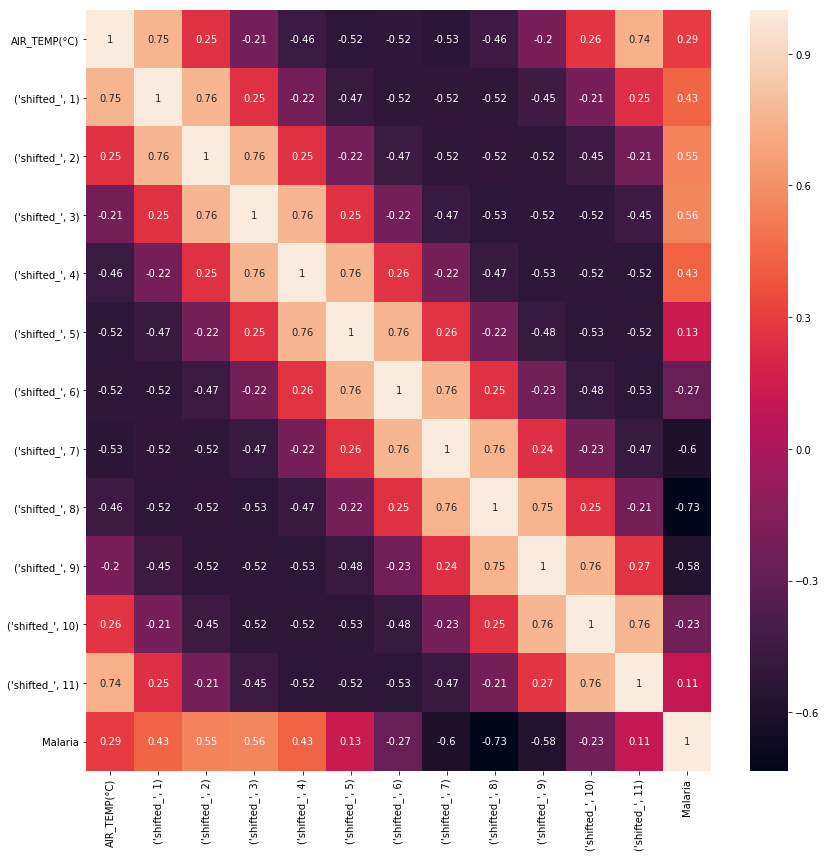

In [81]:
temperature_diff_df = pd.DataFrame(finalcsv['AIR_TEMP(°C)'],columns=["AIR_TEMP(°C)"])

for i in range(1,12):
    temperature_diff_df["shifted_",i] = finalcsv['AIR_TEMP(°C)'].shift(i)

temperature_diff_df['Malaria'] = finalcsv['Malaria_cases']

temperature_diff_df_corr = temperature_diff_df.corr()

plt.figure(figsize=(14,14))
sns.heatmap(temperature_diff_df_corr,annot=True)

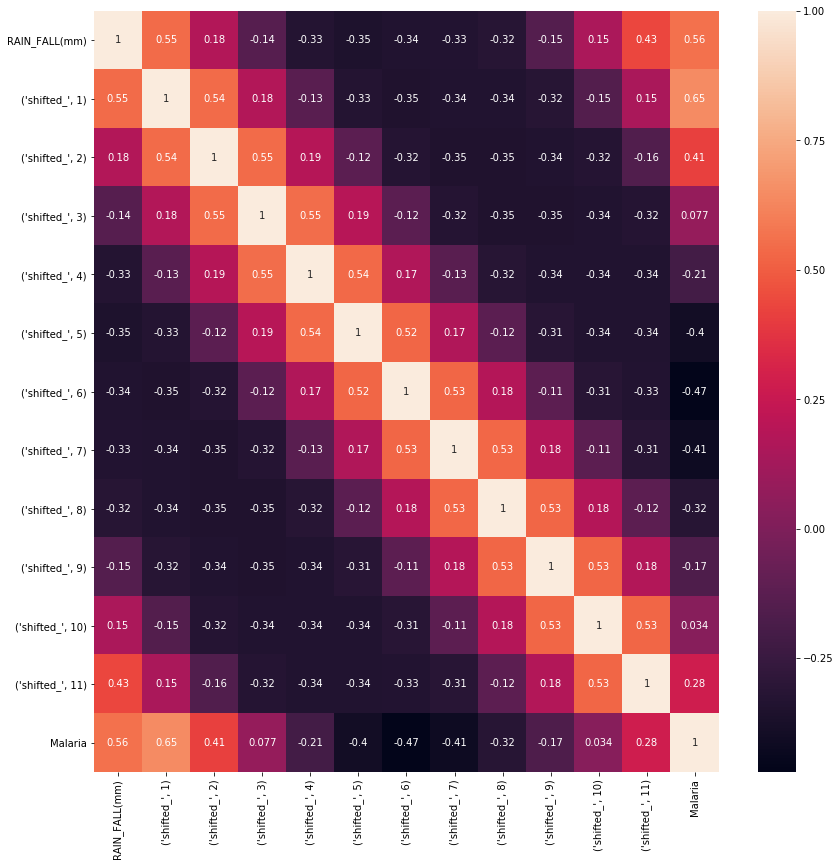

In [82]:
rainfall_diff_df = pd.DataFrame(finalcsv['RAIN_FALL(mm)'],columns=["RAIN_FALL(mm)"])

for i in range(1,12):
    rainfall_diff_df["shifted_",i] = finalcsv['RAIN_FALL(mm)'].shift(i)

rainfall_diff_df['Malaria'] = finalcsv['Malaria_cases']

rainfall_diff_df_corr = rainfall_diff_df.corr()

plt.figure(figsize=(14,14))
sns.heatmap(rainfall_diff_df_corr,annot=True)

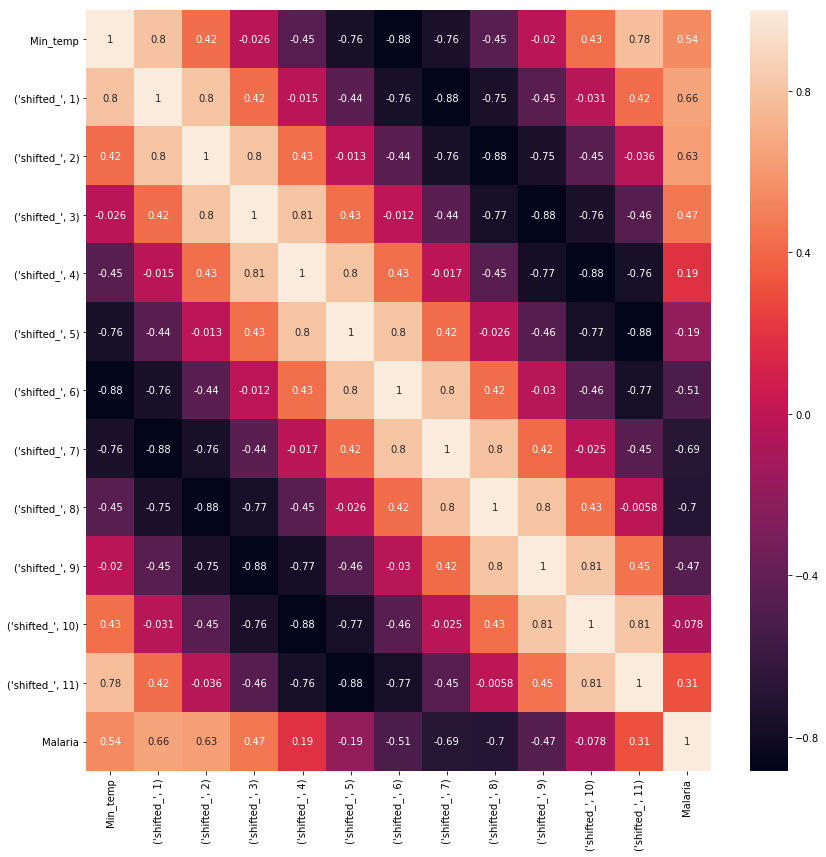

In [83]:
min_temperature_diff_df = pd.DataFrame(finalcsv['Min_temp'],columns=["Min_temp"])

for i in range(1,12):
    min_temperature_diff_df["shifted_",i] = finalcsv['Min_temp'].shift(i)

min_temperature_diff_df['Malaria'] = finalcsv['Malaria_cases']

min_temperature_diff_df_corr = min_temperature_diff_df.corr()

plt.figure(figsize=(14,14))
sns.heatmap(min_temperature_diff_df_corr,annot=True)

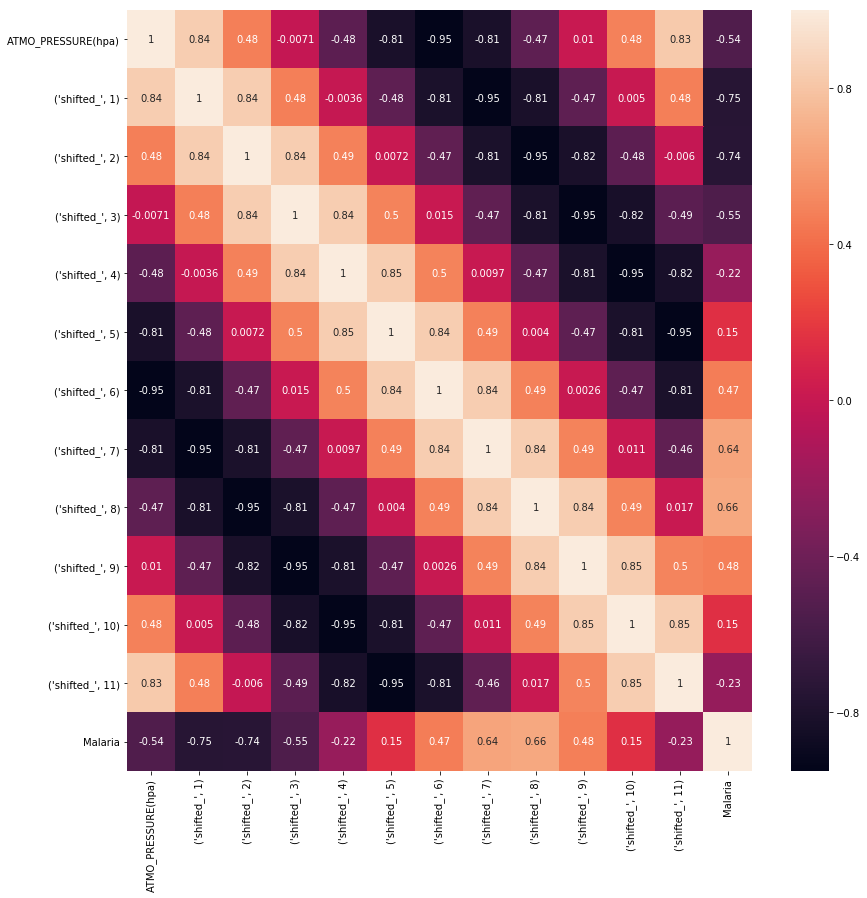

In [84]:
pressure_diff_df = pd.DataFrame(finalcsv['ATMO_PRESSURE(hpa)'],columns=["ATMO_PRESSURE(hpa)"])

for i in range(1,12):
    pressure_diff_df["shifted_",i] = finalcsv['ATMO_PRESSURE(hpa)'].shift(i)

pressure_diff_df['Malaria'] = finalcsv['Malaria_cases']

pressure_diff_df_corr = pressure_diff_df.corr()

plt.figure(figsize=(14,14))
sns.heatmap(pressure_diff_df_corr,annot=True)

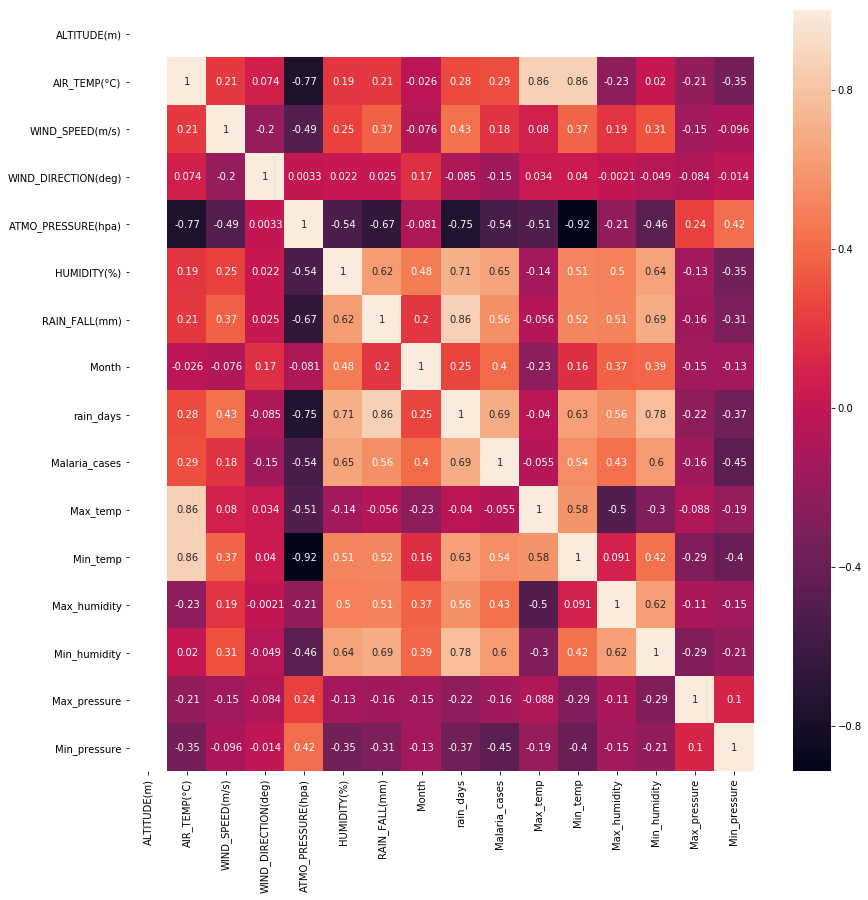

In [85]:
plt.figure(figsize=(14,14))
sns.heatmap(finalcsv_corr,annot=True)

In [86]:
fig = make_subplots(specs=[[{"secondary_y":True}]])
fig.add_trace(go.Scatter(x=finalcsv.index,y=finalcsv['AIR_TEMP(°C)'],name='AIR_TEMP(°C)'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv.index,y=finalcsv['HUMIDITY(%)'],name='HUMIDITY(%)'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv.index,y=finalcsv['ATMO_PRESSURE(hpa)'],name='ATMO_PRESSURE(hpa)'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv.index,y=finalcsv['WIND_SPEED(m/s)'],name='WIND_SPEED(m/s)'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv.index,y=finalcsv['RAIN_FALL(mm)'],name='RAIN_FALL(mm)'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv.index,y=finalcsv['Malaria_cases'],name='Malaria'))

In [87]:
malaria_df = finalcsv.copy()

In [88]:
malaria_df.columns

Index(['ALTITUDE(m)', 'AIR_TEMP(°C)', 'WIND_SPEED(m/s)', 'WIND_DIRECTION(deg)',
       'ATMO_PRESSURE(hpa)', 'HUMIDITY(%)', 'RAIN_FALL(mm)', 'Month',
       'rain_days', 'Malaria_cases', 'Max_temp', 'Min_temp', 'Max_humidity',
       'Min_humidity', 'Max_pressure', 'Min_pressure'],
      dtype='object')

In [89]:
malaria_df = malaria_df.drop(['ALTITUDE(m)','WIND_SPEED(m/s)','WIND_DIRECTION(deg)','Month','Max_temp',
                                         'Max_humidity','Max_pressure', 'Min_pressure'],axis=1)

In [90]:
malaria_df['Temperature_shifted_1'] = malaria_df['AIR_TEMP(°C)'].shift(1)
malaria_df['Rainfall_shifted_1'] = malaria_df['RAIN_FALL(mm)'].shift(1)
malaria_df['min_temp_shifted_1'] = malaria_df['Min_temp'].shift(1)
malaria_df['pressure_shifted_1'] = malaria_df['ATMO_PRESSURE(hpa)'].shift(1)

In [91]:
malaria_df_final = malaria_df.dropna()

In [92]:
malaria_df_final_corr = malaria_df_final.corr()

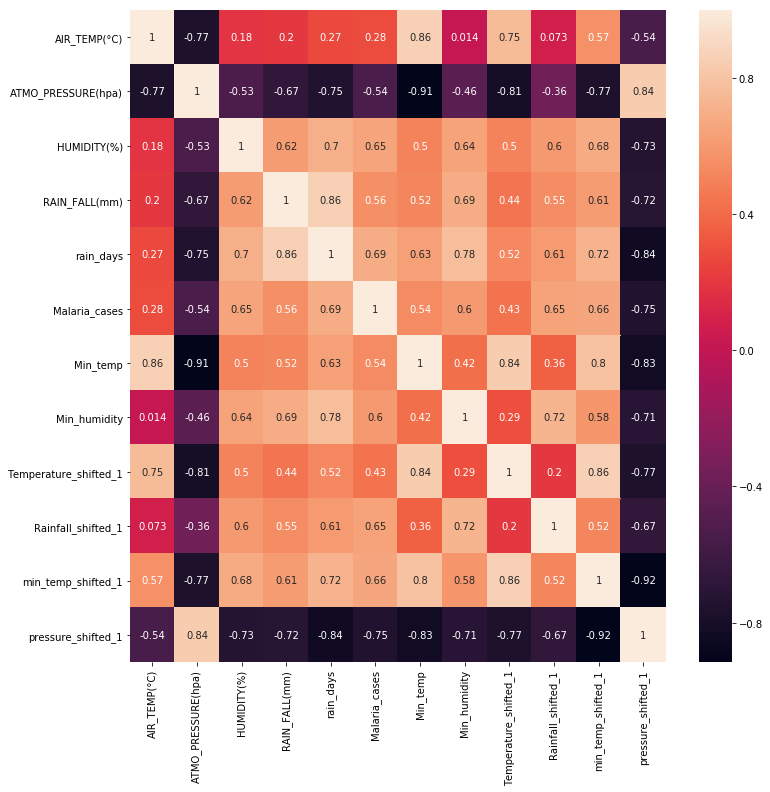

In [93]:
plt.figure(figsize=(12,12))
sns.heatmap(malaria_df_final_corr,annot=True)

In [94]:
malaria_df_final.columns

Index(['AIR_TEMP(°C)', 'ATMO_PRESSURE(hpa)', 'HUMIDITY(%)', 'RAIN_FALL(mm)',
       'rain_days', 'Malaria_cases', 'Min_temp', 'Min_humidity',
       'Temperature_shifted_1', 'Rainfall_shifted_1', 'min_temp_shifted_1',
       'pressure_shifted_1'],
      dtype='object')

In [95]:
malaria_df.iloc[-20,5] = 406
malaria_df.iloc[-19,5] = 435


In [96]:
malaria_df.iloc[-6,5] = 502
malaria_df.iloc[-5,5] = 650

In [97]:
logged_malaria= np.log(malaria_df['Malaria_cases'])

In [98]:
px.line(y=logged_malaria)

In [99]:
logged_dif = logged_malaria.diff()

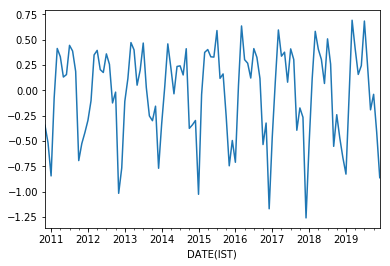

In [100]:
logged_dif[10:].plot()

In [101]:
px.line(y=logged_dif)

In [102]:
stationarity_or_not_ad_fuller(finalcsv['Malaria_cases'])

Results of Dickey-Fuller Test:
Test Statistic                  -0.902580
p-value                          0.787122
#Lags Used                      13.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


In [103]:
stationarity_or_not_ad_fuller(logged_dif[1:])

Results of Dickey-Fuller Test:
Test Statistic                  -3.525672
p-value                          0.007352
#Lags Used                      12.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


In [104]:
auto_arima(logged_dif[1:],start_p=0,start_q=0,start_P=0,start_Q=0,trend='n',m=12,alpha=0.9,error_action='ignore',d=1)

c:\users\madhav\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

c:\users\madhav\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

c:\users\madhav\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

c:\users\madhav\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

c:\users\madhav\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

c:\users\madhav\anaconda3\lib\site-packages\statsmodels\tsa\state

ARIMA(maxiter=50, method='lbfgs', order=(2, 1, 1), out_of_sample_size=0,
   scoring='mse', scoring_args=None, seasonal_order=(1, 0, 2, 12),
   start_params=None, suppress_warnings=False, trend='n',
   with_intercept=True)

In [105]:
malaria_acf = acf(logged_dif[1:],nlags=64,fft=False)
px.bar(y=malaria_acf)

In [106]:
malaria_pacf = pacf(logged_dif[1:],nlags=36)
px.bar(y=malaria_pacf)

In [107]:
X = logged_dif[1:]
sarima_len = int(len(X) * 0.8)

sarima_train,sarima_test = X[0:sarima_len],X[sarima_len:len(X)]

In [108]:
pred_temp

NameError: name 'pred_temp' is not defined

In [ ]:
sarima_pred = []
sarima_history = [x for x in sarima_train]

for i in range(len(sarima_test)):
    sarima_model =SARIMAX(sarima_history, trend='n', order=(1,1,1), seasonal_order=(1,1,3,12),enforce_invertibility=False,
                       enforce_stationarity=False)
    sarima_result = sarima_model.fit()
    sarima_output = sarima_result.forecast()
    sarima_pred.append(sarima_output[0])
    sarima_history.append(sarima_test[i])
    print('predicted={0}/texpected={1}'.format(sarima_output[0],sarima_test[i]))

In [ ]:
# sarima_pred = []
# sarima_history = [x for x in sarima_train]

# for i in range(len(sarima_test)):
#     sarima_model =SARIMAX(sarima_history, trend='c', order=(2,0,0), seasonal_order=(1,0,1,12),enforce_invertibility=False,
#                        enforce_stationarity=False)
#     sarima_result = sarima_model.fit()
#     sarima_output = sarima_result.forecast()
#     sarima_pred.append(sarima_output[0])
#     sarima_history.append(sarima_test[i])
#     print('predicted={0}/texpected={1}'.format(sarima_output[0],sarima_test[i]))

In [ ]:
fig = make_subplots()
fig.add_trace(go.Scatter(y=sarima_test,name='Given Malaria Disease'))
fig.add_trace(go.Scatter(y=sarima_pred,name='Predicted Values'))

In [ ]:
real_diff_pred = np.empty(len(sarima_pred))
real_diff_test = np.empty(len(sarima_test))

In [ ]:
logged_malaria[-13:]

In [ ]:
len(sarima_pred)

In [ ]:
for i in range(len(sarima_pred)):
    real_diff_pred[i] = logged_malaria[-25+i] + sarima_pred[i]
    real_diff_test[i] = logged_malaria[-25+i] + sarima_test[i]

In [ ]:
malaria_pred_temp = np.empty(len(real_diff_pred))
malaria_test_temp = np.empty(len(real_diff_test))

In [ ]:
malaria_pred_temp = np.exp(real_diff_pred)
malaria_test_temp = np.exp(real_diff_test)

In [ ]:
print('Accuracy is {0}%'.format(math.ceil(r2_score(malaria_test_temp,malaria_pred_temp) * 100)))

In [ ]:
fig = make_subplots()
fig.add_trace(go.Scatter(y=malaria_test_temp,name='Actual Malaria Cases',mode='lines+markers'))
fig.add_trace(go.Scatter(y=malaria_pred_temp,name='Predicted Values'))

In [ ]:
mean_absolute_percentage_error(malaria_test_temp,malaria_pred_temp)

In [ ]:
sarima_result.fittedvalues

In [ ]:
logged_dif

In [ ]:
sarima_result.summary()

In [ ]:








# lengh = len(malaria_df['Malaria_cases']) +1

# temp1= np.empty(lengh)

# temp1[:-1] = malaria_df['Malaria_cases']

# temp1[-1] = 45

# len(temp1)

# logged = np.array()





# forecast_malaria

# tem_1 = logged_malaria[-1] + forecast_malaria[0]

# temp_1 = np.exp(tem_1)

# temp_1

# tem_2 = tem_1 + forecast_malaria[1]

# temp_2 = np.exp(tem_2)

# temp_2

# tem_3 = tem_2 + forecast_malaria[2]

# temp_3 = np.exp(tem_3)

# temp_3



# malaria_df['Malaria_cases']







# lengh = len(malaria_df['Malaria_cases']) +1

# temp1= np.empty(lengh)

# temp1[:-1] = malaria_df['Malaria_cases']

# temp1[-1] = 45
# # temp1[-1] = 38

# len(temp1)

# logged_df = pd.DataFrame(temp1,columns=['malaria_temp'])

# logged_df.index = pd.date_range('2010-01-31',freq='M',periods=121)

# logged_df_log = np.log(logged_df['malaria_temp'])

# logged_df_log_diff = logged_df_log.diff()

# logged_final_jan = logged_df_log_diff.dropna()

# single_model = SARIMAX(logged_final_jan, trend='n', order=(1,1,1), seasonal_order=(1,1,3,12),enforce_stationarity=False,
#                        enforce_invertibility=False)

# malaria_model = single_model.fit()

# forecast_malaria = malaria_model.forecast(steps=4)

# forecast_malaria

# logged_df_log[-2:]

# logged_final_jan[-2:]

# tem_1 = logged_df_log[-1] + forecast_malaria[0]

# temp_1 = np.exp(tem_1)

# temp_1

# tem_2 = tem_1 + forecast_malaria[1]

# temp_2 = np.exp(tem_2)

# temp_2

# tem_3 = tem_2 + forecast_malaria[2]

# temp_3 = np.exp(tem_3)

# temp_3



# len(logged_dif)

# len(finalcsv['Malaria_cases'])

# fig = make_subplots(rows=1, cols=2)
# fig.add_trace(
#     go.Scatter(y=logged_dif[12:]),
#     row=1, col=2
# )
# fig.add_trace(
#     go.Scatter(y=finalcsv.iloc[12:,9]),
#     row=1, col=1
# )
# fig.update_layout(height=400, width=800, title_text="              Before transformation                        After transformation")

# plt.figure(figsize=(10,8))
# auto_corr = autocorrelation_plot(logged_dif[1:])

# from statsmodels.graphics.tsaplots import plot_pacf

# plot_pacf(logged_dif[1:], lags=48)

# malaria_list[-12:]

# finalcsv.iloc[-12:,9]

